In [1]:
setwd ("~/WGS/Sequences/Metrics/")

In [2]:
cov=read.table("Coverage_Pool4.txt")

In [3]:
colnames(cov)=c("Scaffold", "depth", "NumBp", "BpTotal", "Percent", "Sample")

In [4]:
cov$percentage=(as.numeric(as.character(cov$Percent)))*100

In [5]:
head(cov)

Scaffold,depth,NumBp,BpTotal,Percent,Sample,percentage
GL429767,0,33093841,64990205,0.50921300,NY_E_15,50.921300
GL429767,1,18210045,64990205,0.28019700,NY_E_15,28.019700
GL429767,2,8655556,64990205,0.13318200,NY_E_15,13.318200
GL429767,3,3338097,64990205,0.05136310,NY_E_15,5.136310
GL429767,4,1143281,64990205,0.01759160,NY_E_15,1.759160
GL429767,5,365033,64990205,0.00561674,NY_E_15,0.561674


In [6]:
zero=cov[cov$depth==0,]

In [7]:
zero$depth=NULL
zero$Percent=NULL
zero$Percentage=NULL

In [8]:
head(zero)

,Scaffold,NumBp,BpTotal,Sample,percentage
1,GL429767,33093841,64990205,NY_E_15,50.9213
90,GL429768,20354328,39494369,NY_E_15,51.5373
117,GL429769,22679124,32863254,NY_E_15,69.0106
208,GL429770,15295864,30916457,NY_E_15,49.4748
353,GL429771,15812367,22519077,NY_E_15,70.2177
404,GL429772,10834931,20945196,NY_E_15,51.7299


In [9]:
require(plyr)

Loading required package: plyr


In [10]:
zero$NumBp=as.numeric(as.character(zero$NumBp))

In [11]:
zero$BpTotal=as.numeric(as.character(zero$BpTotal))

In [12]:
zerosum=ddply(zero, "Sample", numcolwise(sum))

In [13]:
zerosum$percentage=(1-(zerosum$NumBp/zerosum$BpTotal))*100

In [14]:
require(ggplot2)

Loading required package: ggplot2


In [15]:
plot=ggplot(data=zerosum, aes(x=Sample, y=percentage))+
  geom_bar(data=zerosum, stat="identity")+
  theme_bw()+ylab("Percent >= 1x coverage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

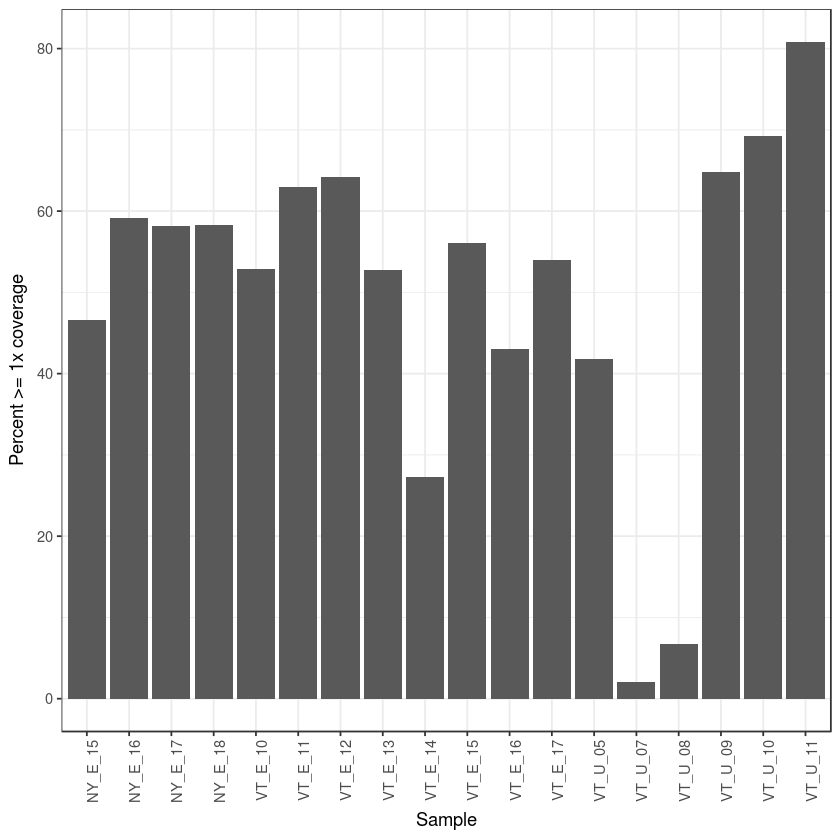

In [16]:
plot